# 1. 데이터준비  및 확인

In [15]:
#모듈 임포트
import pandas as pd

# 데이터 로드
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')


train_data


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


# 2. 데이터 전처리 : 데이터로더 만들기
    - 중복 데이터 제거
    - NaN 결측치 제거
    - 한국어 토크나이저로 토큰화
    - 불용어(Stopwords) 제거
    - 사전(word_to_index) 구성
    - 텍스트 스트링을 사전 인덱스 스트링으로 변환
    - X_train, y_train, X_test, y_test, word_to_index 리턴

In [16]:
# 데이터 전처리 함수 만들기

from konlpy.tag import Mecab
import numpy as np
from collections import Counter

tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']


def load_data(train_data, test_data, num_words=10000):
    
    # 중복데이터 및 결측치 제거
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    
    # 토큰화 : 문장을 형태소 단위로 분리
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)
        
    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)

  
    # 단어사전(word_to_index) 만들기
    words = np.concatenate(X_train).tolist()   # 토큰화 후 리스트로 합치기
    counter = Counter(words)    # 리스트 내 항목을 키값으로 삼고, 키 값의 개수를 출력
    counter = counter.most_common(10000-4)   # 데이터 개수가 많은 순서대로 출력 
    vocab = ['', '', '', ''] + [key for key, _ in counter]    # 단어사전 생성 
    word_to_index = {word:index for index, word in enumerate(vocab)}
    
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index[''] for word in wordlist]
    
    X_train = list(map(wordlist_to_indexlist, X_train))  # map(함수, iterable 인자) : iterable인자(list, dic)을 받아 함수를 실행한 값 출력
    X_test = list(map(wordlist_to_indexlist, X_test))
    
    # x_train, y_train, x_test, y_test, word_to_index 출력
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index


# 로드데이터로 함수 실행
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data) 

    
    

In [17]:
# 데이터 확인
word_to_index

{'': 3,
 '.': 4,
 '영화': 5,
 '다': 6,
 '고': 7,
 '하': 8,
 '을': 9,
 '보': 10,
 '..': 11,
 '게': 12,
 ',': 13,
 '!': 14,
 '지': 15,
 '있': 16,
 '없': 17,
 '?': 18,
 '좋': 19,
 '나': 20,
 '었': 21,
 '만': 22,
 '는데': 23,
 '너무': 24,
 '봤': 25,
 '적': 26,
 '안': 27,
 '정말': 28,
 '로': 29,
 '음': 30,
 '것': 31,
 '아': 32,
 '네요': 33,
 '재밌': 34,
 '어': 35,
 '같': 36,
 '점': 37,
 '지만': 38,
 '진짜': 39,
 '했': 40,
 '에서': 41,
 '기': 42,
 '네': 43,
 '않': 44,
 '거': 45,
 '았': 46,
 '수': 47,
 '되': 48,
 '면': 49,
 'ㅋㅋ': 50,
 '말': 51,
 '연기': 52,
 '인': 53,
 '주': 54,
 '내': 55,
 '최고': 56,
 '~': 57,
 '평점': 58,
 '이런': 59,
 '던': 60,
 '어요': 61,
 '할': 62,
 '왜': 63,
 '겠': 64,
 '1': 65,
 '스토리': 66,
 '해': 67,
 '습니다': 68,
 'ㅋㅋㅋ': 69,
 '...': 70,
 '드라마': 71,
 '생각': 72,
 '아니': 73,
 '더': 74,
 '그': 75,
 '싶': 76,
 '사람': 77,
 '듯': 78,
 '때': 79,
 '감동': 80,
 '함': 81,
 '배우': 82,
 '본': 83,
 '까지': 84,
 '뭐': 85,
 '알': 86,
 '만들': 87,
 '내용': 88,
 '볼': 89,
 '감독': 90,
 '보다': 91,
 '라': 92,
 '그냥': 93,
 '재미': 94,
 '시간': 95,
 '지루': 96,
 '중': 97,
 '재미있': 98,
 '년': 

In [18]:
# index_to_word 만들기
index_to_word = {index:word for word, index in word_to_index.items()}
index_to_word

{3: '',
 4: '.',
 5: '영화',
 6: '다',
 7: '고',
 8: '하',
 9: '을',
 10: '보',
 11: '..',
 12: '게',
 13: ',',
 14: '!',
 15: '지',
 16: '있',
 17: '없',
 18: '?',
 19: '좋',
 20: '나',
 21: '었',
 22: '만',
 23: '는데',
 24: '너무',
 25: '봤',
 26: '적',
 27: '안',
 28: '정말',
 29: '로',
 30: '음',
 31: '것',
 32: '아',
 33: '네요',
 34: '재밌',
 35: '어',
 36: '같',
 37: '점',
 38: '지만',
 39: '진짜',
 40: '했',
 41: '에서',
 42: '기',
 43: '네',
 44: '않',
 45: '거',
 46: '았',
 47: '수',
 48: '되',
 49: '면',
 50: 'ㅋㅋ',
 51: '말',
 52: '연기',
 53: '인',
 54: '주',
 55: '내',
 56: '최고',
 57: '~',
 58: '평점',
 59: '이런',
 60: '던',
 61: '어요',
 62: '할',
 63: '왜',
 64: '겠',
 65: '1',
 66: '스토리',
 67: '해',
 68: '습니다',
 69: 'ㅋㅋㅋ',
 70: '...',
 71: '드라마',
 72: '생각',
 73: '아니',
 74: '더',
 75: '그',
 76: '싶',
 77: '사람',
 78: '듯',
 79: '때',
 80: '감동',
 81: '함',
 82: '배우',
 83: '본',
 84: '까지',
 85: '뭐',
 86: '알',
 87: '만들',
 88: '내용',
 89: '볼',
 90: '감독',
 91: '보다',
 92: '라',
 93: '그냥',
 94: '재미',
 95: '시간',
 96: '지루',
 97: '중',
 98: '재미있',
 99: '

In [19]:
# 문장 인코딩(문자->숫자) 및 디코딩(숫자->문자) 함수 만들기

    # 하나의 문장을 인코딩하는 함수
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']] + [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

    # 여러 개 문장을 인코딩 하는 함수
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

    # 하나의 문장을 디코딩하는 함수
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])   # [1:]를 통해 <BOS>제외

    # 여러 개 문장을 디코딩하는 함수
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]


In [20]:
# word_to_index 및 index_to_word 보정

    # <PAD>, <UNK>, <BOS> 삽입

word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2

index_to_word = {index:word for word, index in word_to_index.items()}

    # 삽입 여부 확인
index_to_word[0]



'<PAD>'

In [21]:
# 문장 길이 통일 1. : 문장 최대길이 및 maxlen 구하기

    # 훈련 및 테스트 데이터 합치기
total_data_text = list(X_train) + list(X_test)

    # 문장 별 길이 뽑기 후 리스트(넘파이)로 변환
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)

    # 문장 길이 평균 및 표준편차 확인
print('평균 문장 길이: ', np.mean(num_tokens))
print('최대 문장 길이: ', np.max(num_tokens))
print('문장 길이 표준편차: ', np.std(num_tokens))

    # 문장 최대 길이 제한
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
    
print('pad_sequences maxlen: ', maxlen)    
print('전체문장의 {}%가 maxlen 설정 값 내에 포함.'.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))
    

평균 문장 길이:  15.96940191154864
최대 문장 길이:  116
문장 길이 표준편차:  12.843571191092
pad_sequences maxlen:  41
전체문장의 0.9342988343341575%가 maxlen 설정 값 내에 포함.


In [22]:
# 문장 길이 통일 2 : tf.keras.preprocessing.sequence.pad_sequences 활용

import tensorflow as tf

X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, 
                                                        value = word_to_index["<PAD>"], 
                                                        padding = 'post', 
                                                        maxlen=maxlen)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, 
                                                      value=word_to_index["<PAD>"], 
                                                      padding = 'post', 
                                                      maxlen=maxlen)


                                                       

# 3. 모델 설계  및 검증세트 분리

In [23]:
# 1-1 RNN 모델 설계

vocab_size = 10000
word_vector_dim = 16

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
lstm (LSTM)                  (None, 16)                2112      
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 162,401
Trainable params: 162,401
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 1-2 CNN 모델 설계

vocab_size = 10000
word_vector_dim = 4

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape = (None,)))
model2.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model2.add(tf.keras.layers.MaxPooling1D(5))
model2.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model2.add(tf.keras.layers.GlobalMaxPooling1D())
model2.add(tf.keras.layers.Dense(8, activation='relu'))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 4)           40000     
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          464       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [25]:
# 2. 검증세트 분리

from sklearn.model_selection import train_test_split

partial_X_train, X_val, partial_y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=21)

print(len(X_train))
print(len(partial_X_train))



146182
116945


In [49]:
# 3-1 모델 학습 - RNN

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

epochs = 20

history = model.fit(partial_X_train, 
                   partial_y_train, 
                   epochs=epochs, 
                   batch_size=512, 
                   validation_data=(X_val, y_val), 
                   verbose=1)

              

Epoch 1/20
229/229 [==============================] - 3s 7ms/step - loss: 0.1840 - accuracy: 0.9222 - val_loss: 0.4755 - val_accuracy: 0.8416
Epoch 2/20
229/229 [==============================] - 1s 5ms/step - loss: 0.1732 - accuracy: 0.9266 - val_loss: 0.4980 - val_accuracy: 0.8387
Epoch 3/20
229/229 [==============================] - 1s 5ms/step - loss: 0.1662 - accuracy: 0.9308 - val_loss: 0.5259 - val_accuracy: 0.8423
Epoch 4/20
229/229 [==============================] - 1s 5ms/step - loss: 0.1602 - accuracy: 0.9339 - val_loss: 0.5292 - val_accuracy: 0.8318
Epoch 5/20
229/229 [==============================] - 1s 5ms/step - loss: 0.1546 - accuracy: 0.9364 - val_loss: 0.5278 - val_accuracy: 0.8326
Epoch 6/20
229/229 [==============================] - 1s 5ms/step - loss: 0.1506 - accuracy: 0.9380 - val_loss: 0.5505 - val_accuracy: 0.8351
Epoch 7/20
229/229 [==============================] - 1s 5ms/step - loss: 0.1440 - accuracy: 0.9409 - val_loss: 0.5723 - val_accuracy: 0.8350
Epoch 

In [53]:
# 3-2 모델 학습2 - CNN

model2.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

epochs = 20

history2 = model2.fit(partial_X_train, 
                  partial_y_train, 
                  epochs=epochs, 
                  batch_size=512, 
                  validation_data=(X_val, y_val), 
                  verbose=1)


Epoch 1/20
229/229 [==============================] - 2s 5ms/step - loss: 0.5765 - accuracy: 0.6856 - val_loss: 0.3972 - val_accuracy: 0.8268
Epoch 2/20
229/229 [==============================] - 1s 4ms/step - loss: 0.3617 - accuracy: 0.8468 - val_loss: 0.3605 - val_accuracy: 0.8425
Epoch 3/20
229/229 [==============================] - 1s 4ms/step - loss: 0.3246 - accuracy: 0.8655 - val_loss: 0.3569 - val_accuracy: 0.8445
Epoch 4/20
229/229 [==============================] - 1s 5ms/step - loss: 0.3066 - accuracy: 0.8737 - val_loss: 0.3533 - val_accuracy: 0.8462
Epoch 5/20
229/229 [==============================] - 1s 4ms/step - loss: 0.2933 - accuracy: 0.8796 - val_loss: 0.3547 - val_accuracy: 0.8461
Epoch 6/20
229/229 [==============================] - 1s 4ms/step - loss: 0.2824 - accuracy: 0.8856 - val_loss: 0.3649 - val_accuracy: 0.8445
Epoch 7/20
229/229 [==============================] - 1s 5ms/step - loss: 0.2716 - accuracy: 0.8909 - val_loss: 0.3630 - val_accuracy: 0.8463
Epoch 

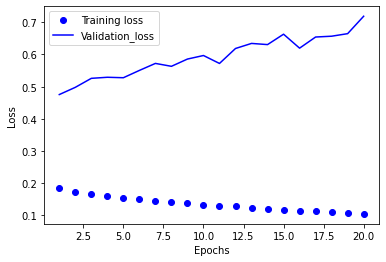

In [50]:
# 4-1 테스트 결과 시각화 : RNN-loss

import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

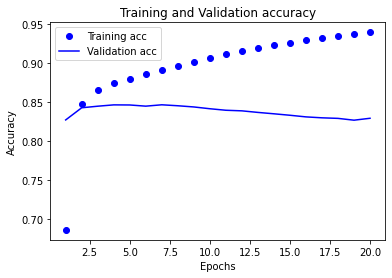

In [56]:
# 4-1 테스트 결과 시각화 : RNN-accuracy

plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

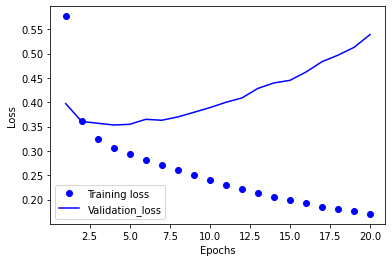

In [61]:
# 4-2 테스트 결과 시각화 : CNN - loss

import matplotlib.pyplot as plt

history_dict2 = history2.history

acc2 = history_dict2['accuracy']
val_acc2 = history_dict2['val_accuracy']
loss2 = history_dict2['loss']
val_loss2 = history_dict2['val_loss']

epochs2 = range(1, len(acc)+1)

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

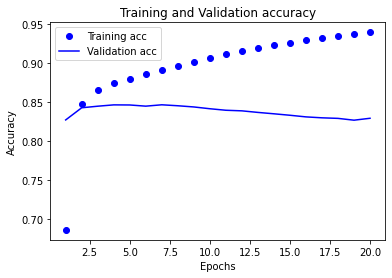

In [62]:
# 4-1 테스트 결과 시각화 : CNN-accuracy

plt.clf()

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 4. 임베딩 레이어 분석

In [26]:
# 임베딩 레이어 가중치 구하기 

embedding_layer = model2.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)

(10000, 4)


In [79]:
# 학습된 Embedding 파라미터를 파일에 써서 저장

import os

word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim)) 

vectors = model2.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()




In [82]:
# word vector로 활용

from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['I']
vector

array([-0.20955278,  0.04907627,  0.11555118, -0.07310516], dtype=float32)

In [84]:
# word vector 테스트
word_vectors.similar_by_word("love")

[('아끼', 0.9994156360626221),
 ('닿', 0.9988088011741638),
 ('버틀러', 0.998802900314331),
 ('립', 0.9987479448318481),
 ('홈즈', 0.9987178444862366),
 ('나위', 0.9984767436981201),
 ('함부로', 0.9979146122932434),
 ('빛났', 0.997801661491394),
 ('당연', 0.9970474243164062),
 ('들이', 0.9970378279685974)]

# 5. word2vec 활용하기

In [10]:
from gensim.models import KeyedVectors
import os

word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/ko.bin'
word2vec = gensim.models.Word2Vec.load(word2vec_path)
word2vec.similar_by_word("사랑")


/tmp/ipykernel_2550/4004936439.py:6: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  word2vec.similar_by_word("사랑")


[('슬픔', 0.7216662764549255),
 ('행복', 0.6759077310562134),
 ('절망', 0.6468985080718994),
 ('기쁨', 0.6458414196968079),
 ('이별', 0.6334798336029053),
 ('추억', 0.6320937275886536),
 ('인생', 0.6216273307800293),
 ('애정', 0.6206069588661194),
 ('연인', 0.6186063289642334),
 ('유혹', 0.5965287685394287)]

In [28]:
# 임베딩 레이어 word2vec으로 교체

import numpy as np

    # 10000 x 300 난수 매트릭스 생성
vocab_size = 10000
word_vector_dim =300
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

    # 난수 매트릭스에 워드벡터 삽입
for i in range(3, vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] == word2vec[index_to_word[i]]
embedding_matrix

/tmp/ipykernel_2550/3040047632.py:12: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if index_to_word[i] in word2vec:
/tmp/ipykernel_2550/3040047632.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embedding_matrix[i] == word2vec[index_to_word[i]]
/tmp/ipykernel_2550/3040047632.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  embedding_matrix[i] == word2vec[index_to_word[i]]


array([[0.40095207, 0.53533606, 0.68805884, ..., 0.17791802, 0.27598444,
        0.62039491],
       [0.07474577, 0.11447211, 0.21222287, ..., 0.56128375, 0.85010422,
        0.27775159],
       [0.13837274, 0.69808148, 0.20620318, ..., 0.83118105, 0.10250328,
        0.53217561],
       ...,
       [0.41858889, 0.72479764, 0.9467705 , ..., 0.36219935, 0.24477299,
        0.42313989],
       [0.39740242, 0.10900943, 0.2116451 , ..., 0.52641851, 0.86521088,
        0.71587994],
       [0.22287694, 0.84891731, 0.49075441, ..., 0.46686102, 0.93837587,
        0.01908981]])

In [30]:
# 임베딩 레이어 교체후 CNN 모델 생성 

from tensorflow.keras.initializers import Constant

vocab_size = 10000
word_vector_dim = 300

  # 모델 구성
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 
                                   word_vector_dim, 
                                   embeddings_initializer=Constant(embedding_matrix),   #카피한 메트릭스 활용))
                                   input_length=maxlen,
                                   trainable=True))   # trainable을 True로 주면 Fine-tuning
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 41, 300)           3000000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 35, 16)            33616     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 7, 16)             0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 1, 16)             1808      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [32]:
# 모델 학습

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

epochs = 20

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/20
229/229 [==============================] - 5s 10ms/step - loss: 0.6413 - accuracy: 0.6113 - val_loss: 0.5321 - val_accuracy: 0.7267
Epoch 2/20
229/229 [==============================] - 2s 8ms/step - loss: 0.4705 - accuracy: 0.7684 - val_loss: 0.4501 - val_accuracy: 0.7777
Epoch 3/20
229/229 [==============================] - 2s 8ms/step - loss: 0.3924 - accuracy: 0.8255 - val_loss: 0.4241 - val_accuracy: 0.8123
Epoch 4/20
229/229 [==============================] - 2s 8ms/step - loss: 0.3483 - accuracy: 0.8537 - val_loss: 0.4132 - val_accuracy: 0.8186
Epoch 5/20
229/229 [==============================] - 2s 8ms/step - loss: 0.3238 - accuracy: 0.8665 - val_loss: 0.4126 - val_accuracy: 0.8185
Epoch 6/20
229/229 [==============================] - 2s 8ms/step - loss: 0.3002 - accuracy: 0.8798 - val_loss: 0.4129 - val_accuracy: 0.8218
Epoch 7/20
229/229 [==============================] - 2s 8ms/step - loss: 0.2906 - accuracy: 0.8853 - val_loss: 0.4178 - val_accuracy: 0.8219
Epoch

In [34]:
# 테스트셋을 통한 모델 평가

results = model.evaluate(X_test, y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.5197 - accuracy: 0.8070
[0.519718587398529, 0.8070468306541443]
